# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read in data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Unpickle preprocessed training data

df_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/ames-housing/Data/train_preprocessed.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


# Define function to create plots

In [4]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['SalePrice'].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.distplot(data[column])
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 
                  #order=data[column].value_counts().index)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=45)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='SalePrice', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'SalePrice', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=45)
  plt.ylabel('Sale Price', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()

# Visualisations and Observations

* We notice some expected trends like neighborhoods, number of bedrooms, surface areas of the basement, living area etc correlating with saleprice.

* The number of houses sold is higher in the summer, peaking in June. However, an interesting observation was that the month of sale did not strongly correlate with saleprice. Neither did the year of sale.

* Finished vs. unfinished basement surface area doesn't seem to affect saleprice. What matters more appears to be the toal surface area. This could be useful when we feature engineer down the line. 

* Quality (of roof material for example) seems to matter more than present condition. For instance, saleprice was higher for the highest quality of materials than for the highest level of present condition. 

* Note that many of the numeric features are also skewed. We will apply feature transformations later to reduce the skew.

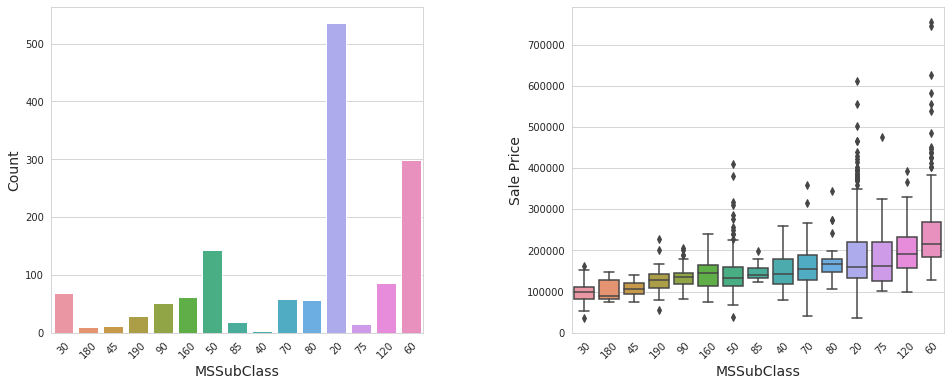

In [5]:
plot_feature(df_train, 'MSSubClass')

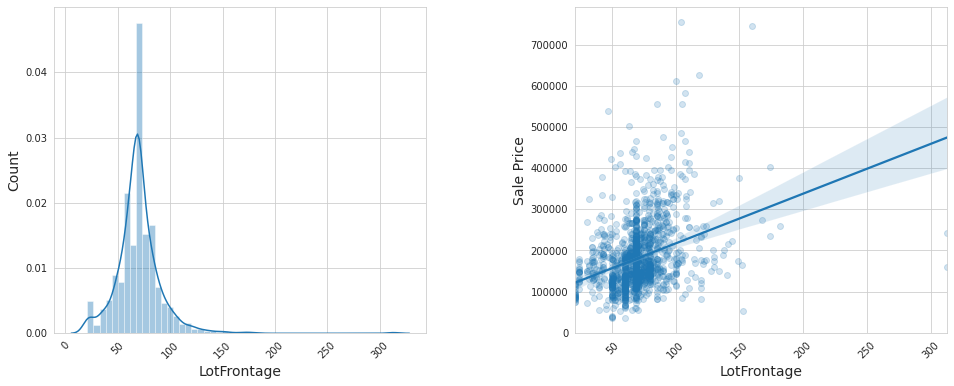

In [6]:
plot_feature(df_train, 'LotFrontage')

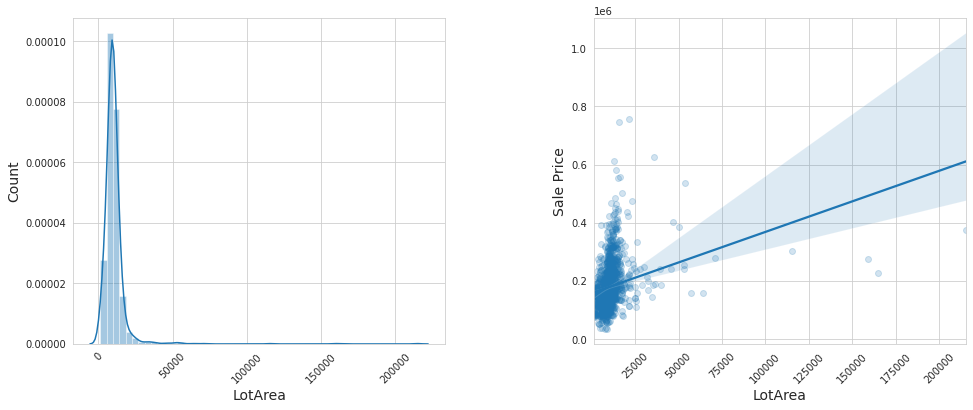

In [7]:
plot_feature(df_train, 'LotArea')

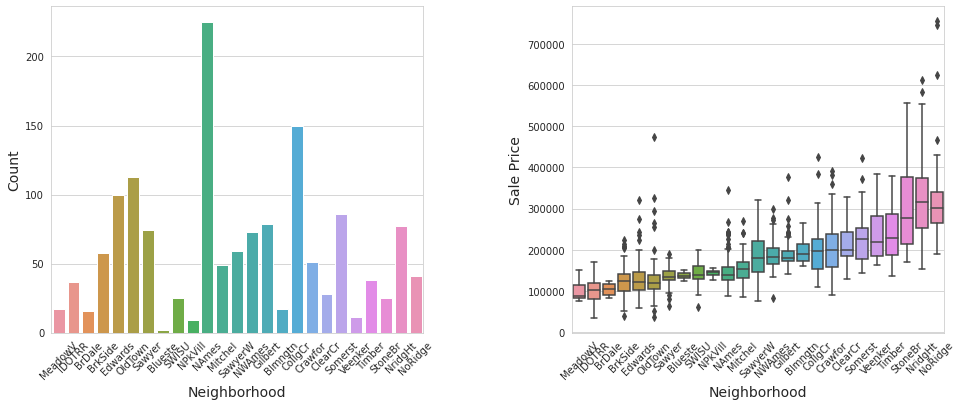

In [8]:
plot_feature(df_train, 'Neighborhood')

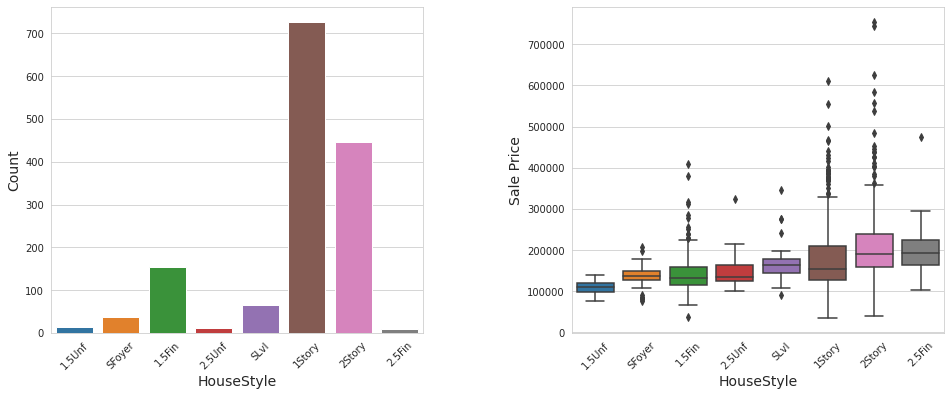

In [9]:
plot_feature(df_train, 'HouseStyle')

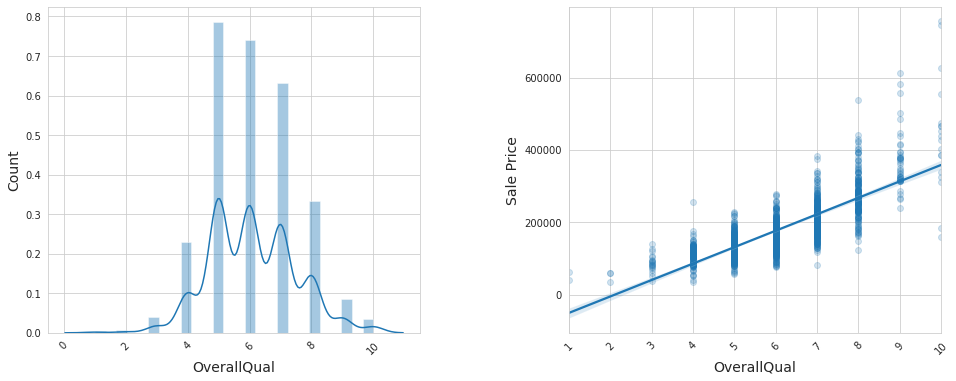

In [10]:
plot_feature(df_train, 'OverallQual')

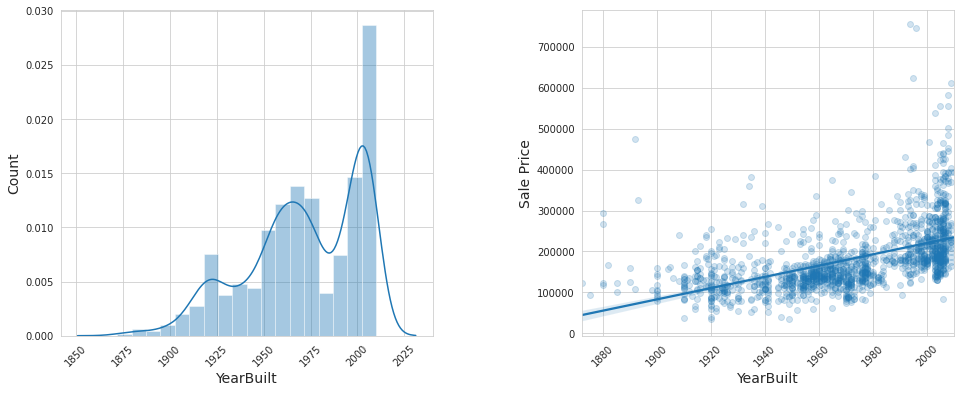

In [11]:
plot_feature(df_train, 'YearBuilt')

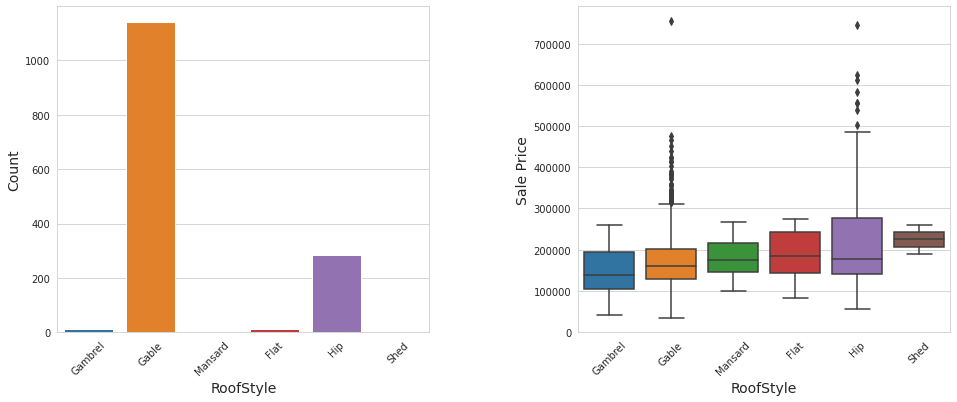

In [12]:
plot_feature(df_train, 'RoofStyle')

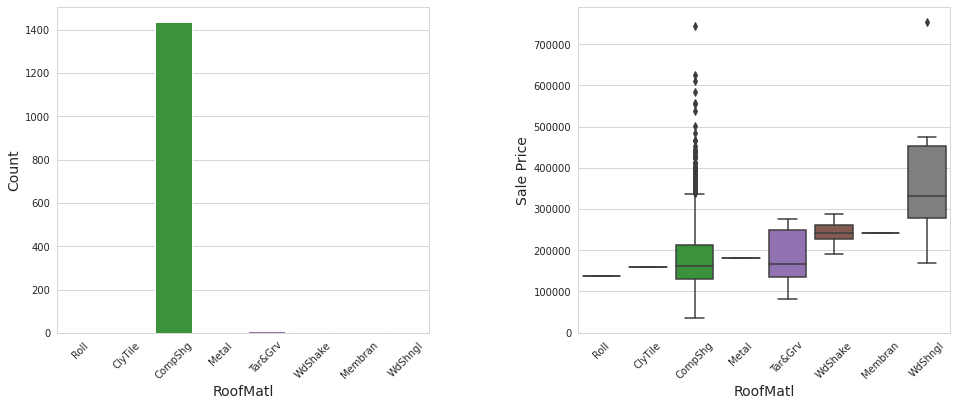

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [13]:
plot_feature(df_train, 'RoofMatl')
df_train['RoofMatl'].value_counts()

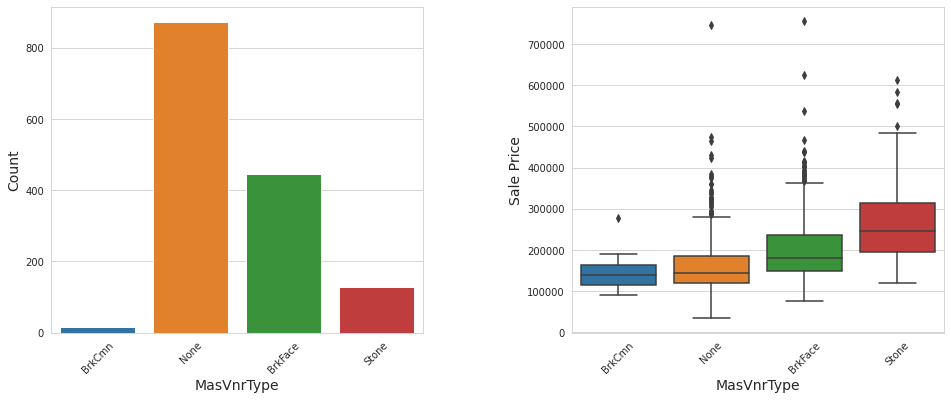

In [14]:
plot_feature(df_train, 'MasVnrType')

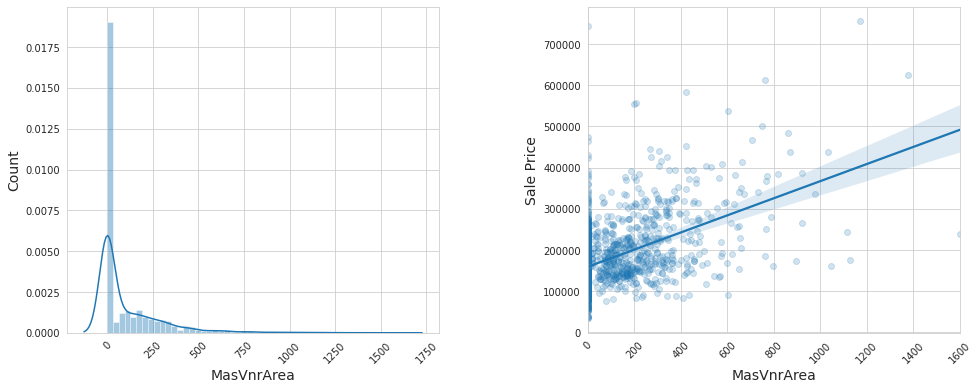

In [15]:
plot_feature(df_train, 'MasVnrArea')

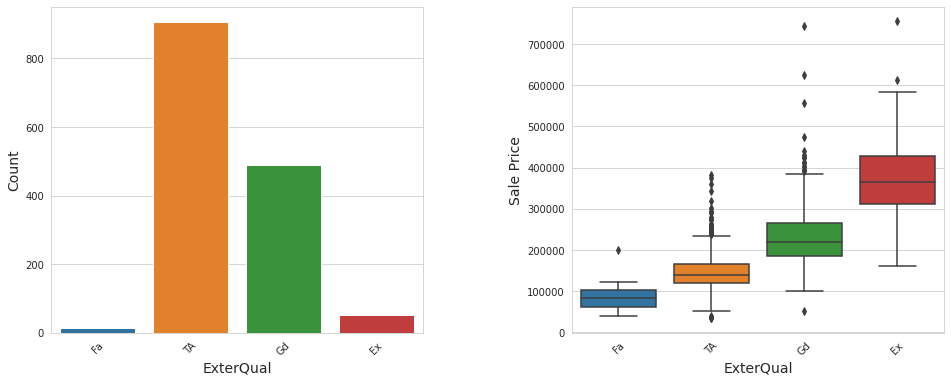

In [16]:
plot_feature(df_train, 'ExterQual')

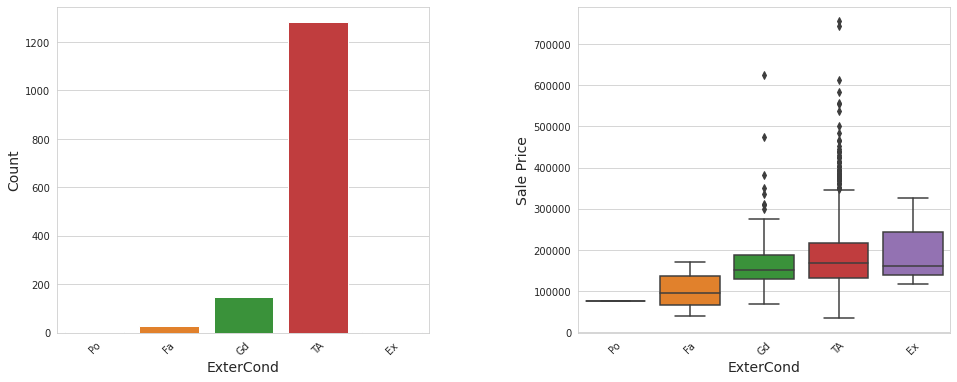

In [17]:
plot_feature(df_train, 'ExterCond')

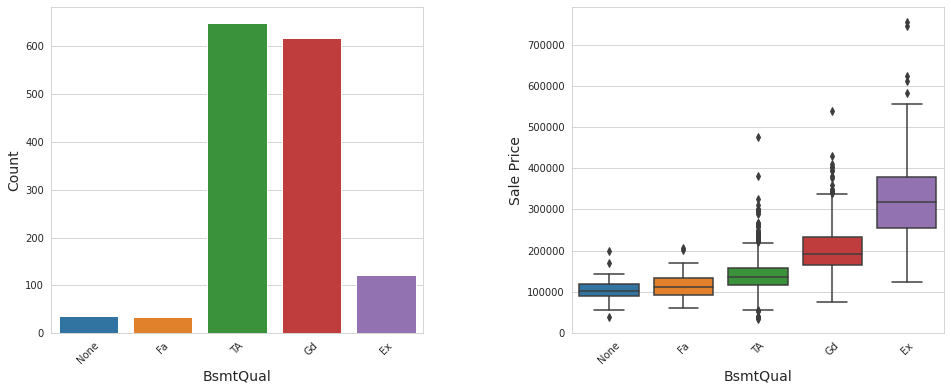

In [18]:
plot_feature(df_train, 'BsmtQual')

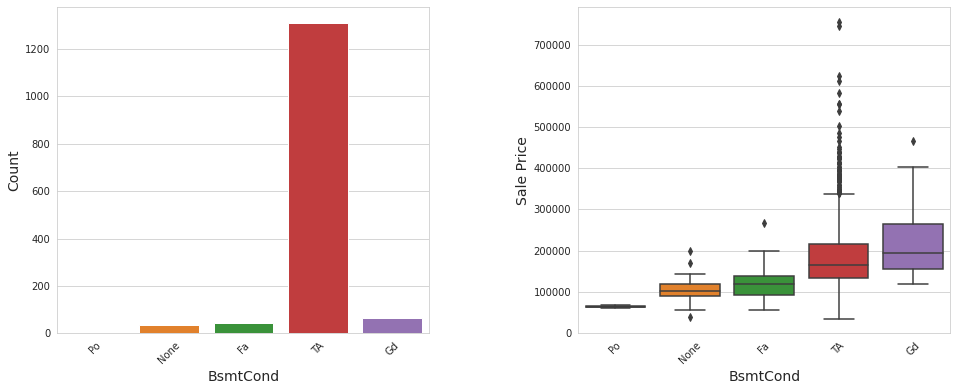

In [19]:
plot_feature(df_train, 'BsmtCond')

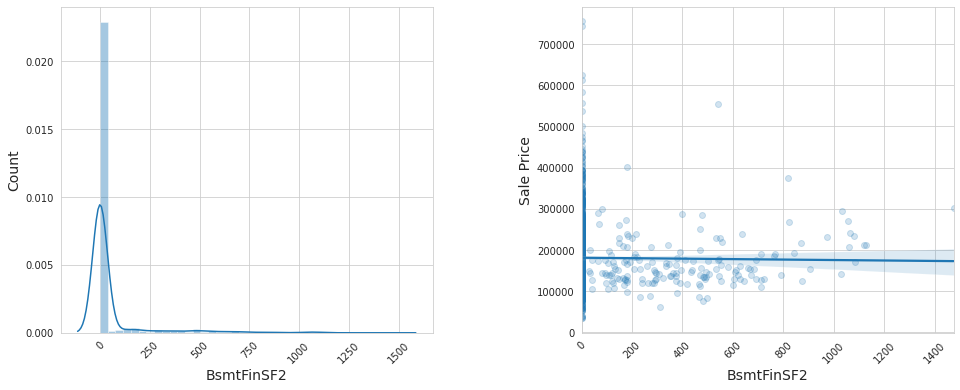

In [20]:
plot_feature(df_train, 'BsmtFinSF2')

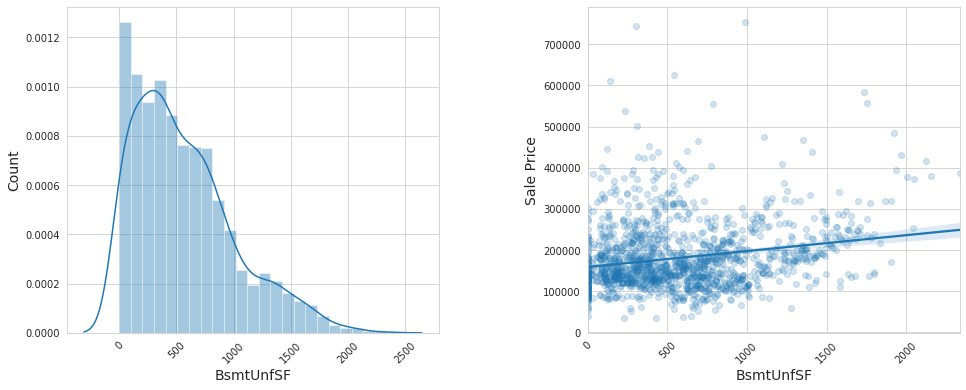

In [21]:
plot_feature(df_train, 'BsmtUnfSF')

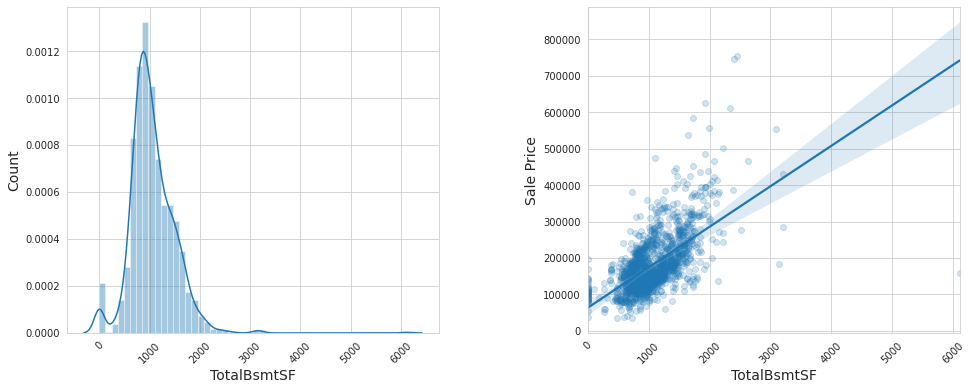

In [22]:
plot_feature(df_train, 'TotalBsmtSF')

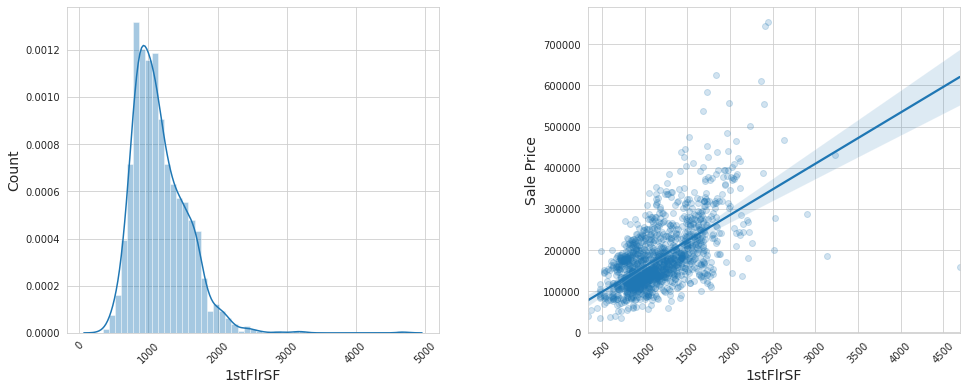

In [23]:
plot_feature(df_train, '1stFlrSF')

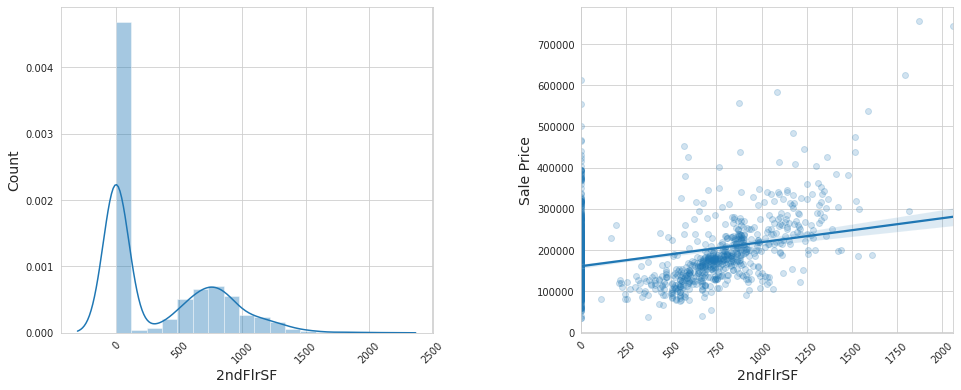

In [24]:
plot_feature(df_train, '2ndFlrSF')

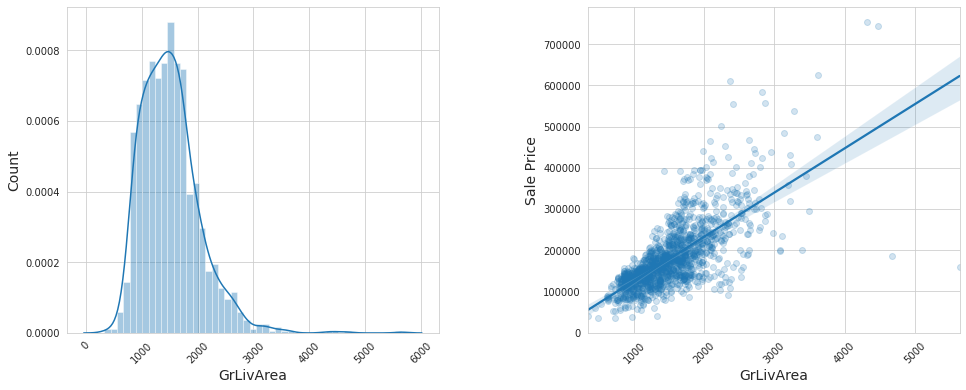

In [25]:
plot_feature(df_train, 'GrLivArea')

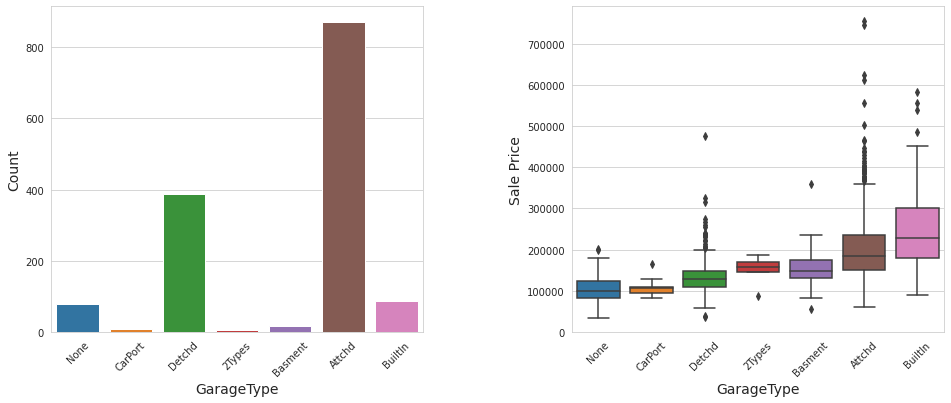

In [26]:
plot_feature(df_train, 'GarageType')

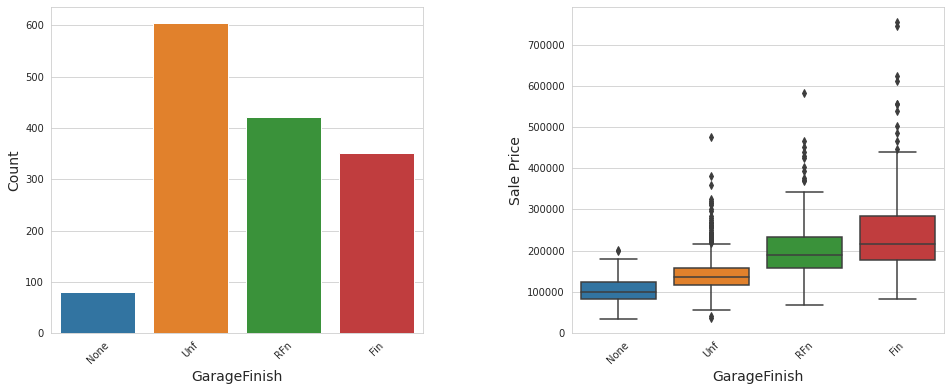

In [27]:
plot_feature(df_train, 'GarageFinish')

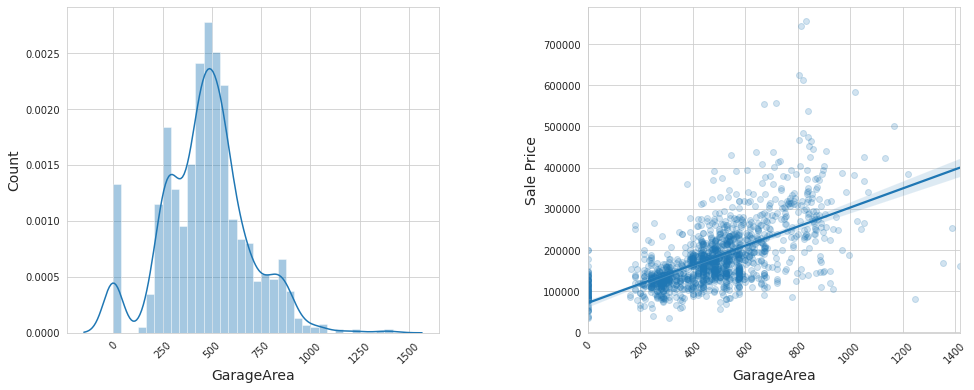

In [28]:
plot_feature(df_train, 'GarageArea')

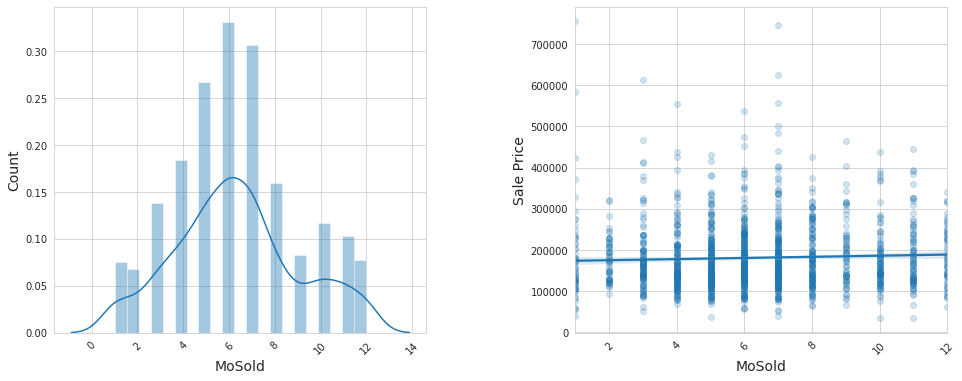

In [29]:
plot_feature(df_train, 'MoSold')

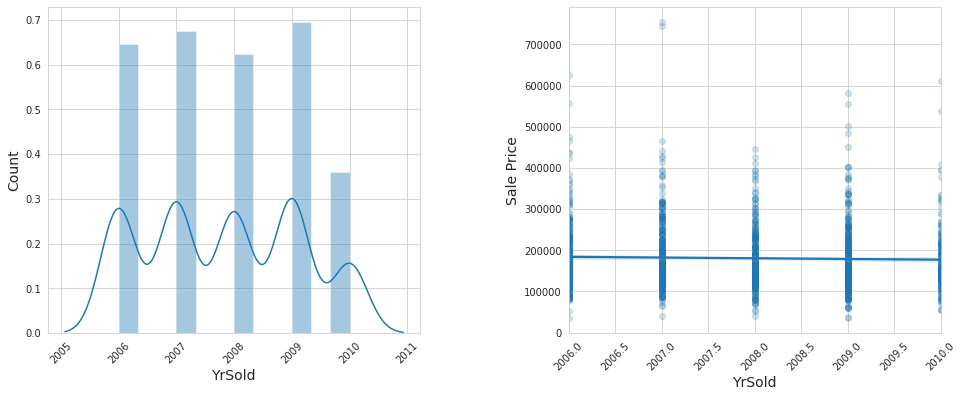

In [30]:
plot_feature(df_train, 'YrSold')

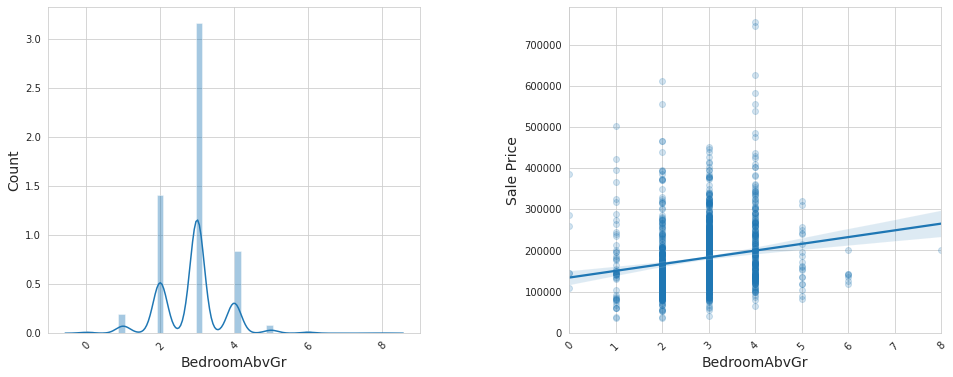

In [31]:
plot_feature(df_train, 'BedroomAbvGr')

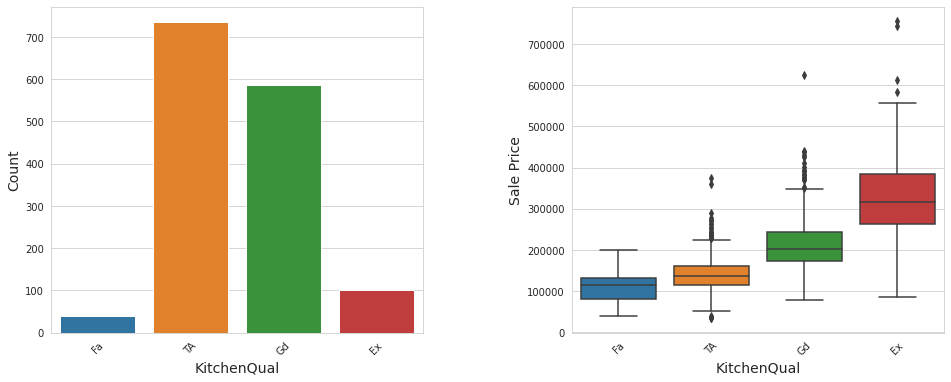

In [32]:
plot_feature(df_train, 'KitchenQual')

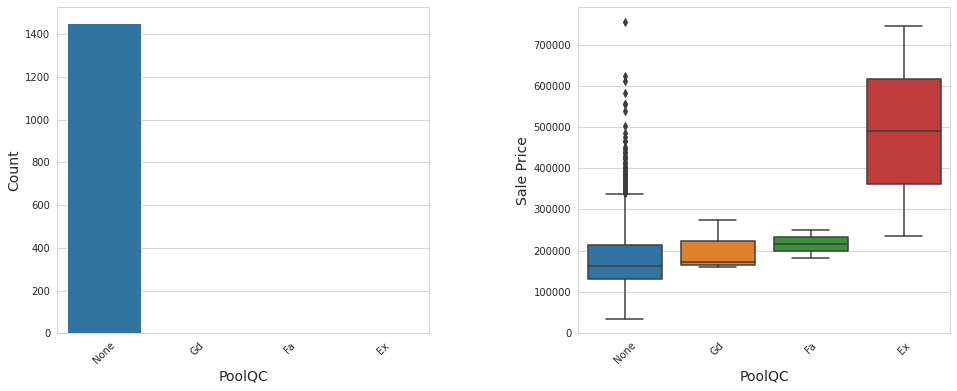

In [33]:
plot_feature(df_train, 'PoolQC')

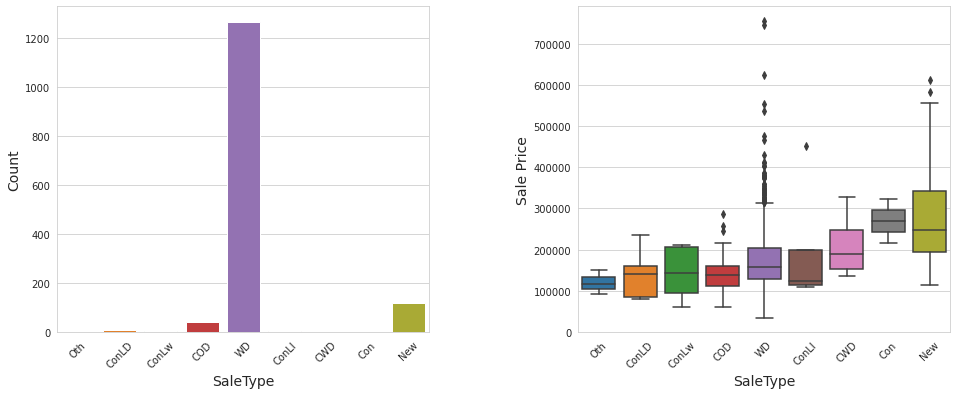

In [34]:
plot_feature(df_train, 'SaleType')

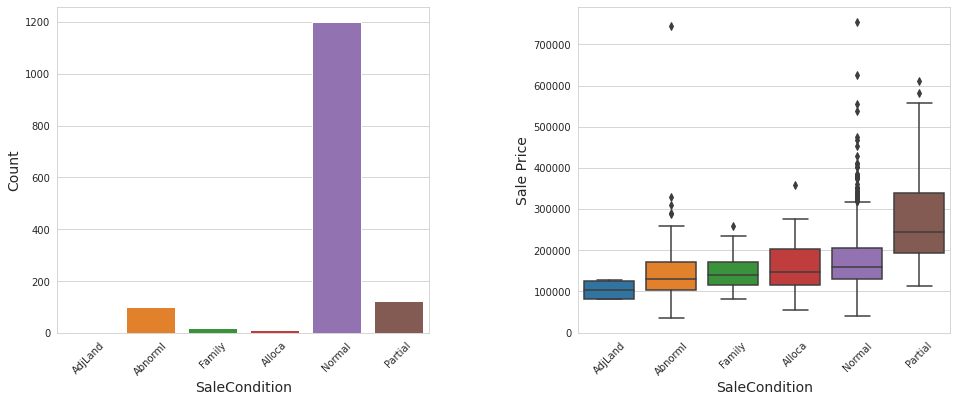

In [35]:
plot_feature(df_train, 'SaleCondition')